#TA2 - calibração de câmera


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


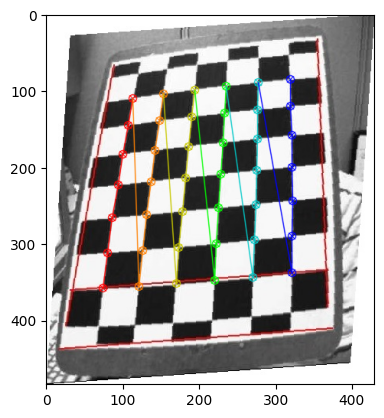

In [ ]:
!pip install cv2_plt_imshow
import numpy as np
import cv2 as cv
import glob
from cv2_plt_imshow import cv2_plt_imshow, plt_format
import matplotlib.pyplot as plt
import time
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
objpoints = [] 
imgpoints = [] 
from google.colab import drive
#drive.authenticate_user()
drive.mount('drive')
list_of_image_files = glob.glob('drive/My Drive/IMAGENS_TRABALHO_TA2/TESTE6/LISTA/*.jpg')
for fname in list_of_image_files:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv2_plt_imshow(img)
        cv.waitKey(500)

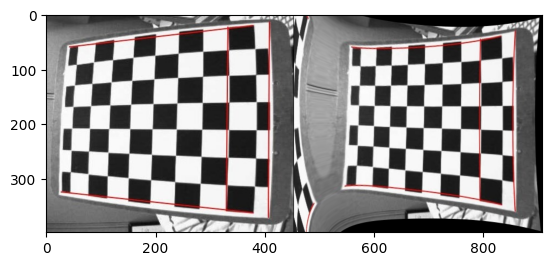

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv.imread('drive/My Drive/IMAGENS_TRABALHO_TA2/TESTE6/IMAGEMTESTE/968.jpg')
img2 = cv.imread('drive/My Drive/IMAGENS_TRABALHO_TA2/TESTE6/IMAGEMTESTE/968.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
undistorted_image = cv.undistort(img, mtx, dist, None, newcameramtx)
combined_image = np.hstack((img2, undistorted_image))
cv2_plt_imshow(combined_image)
cv.waitKey(0)
cv.destroyAllWindows()
